# Evaluating a Linear Model
"Regression analysis generates an equation to describe the statistical relationship between one or more predictor variables and the response variable." That's a quote from the documentation from an old statistical package called minitab. It's wordy, but what it's basically saying is that creating the model is just the beginning. The interpretation of the results is the important part. 

We left off on our last tutorial by plotting the line of best fit. So at this point, we know how to instantiate the model, draw a line of best fit, and use our model to make predictions. 

Let's import our model from the lab: 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
df_x = pd.DataFrame(diabetes.data,
                 columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target,
                 columns=["diabetes"])

# split into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

# instantiate the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=4)

# train
fit = model.fit(x_train, y_train)

# make predictions
preds = model.predict(x_test)

## Evaluating Intercept
B0, the Y-intercept, can be interpreted as the value you would predict for Y if all the features were at 0. 

In [16]:
# view y intercetp (B0)
model.intercept_

array([151.34565535])

## Evaluating Coefficients
Because we've trained the model and made predictions, a good first step here would be to examine our coefficients. The coefficients tell us how much each feature affects our target variable. These basically represent our slope, and represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant.

Unfortunately, we cannot use the coefficients for feature selection because each coefficient can be influenced by the other variables in a regression model and the coefficient doesn't take this effect into consideration. 

In [31]:
# view coefficients
model.coef_

array([[  37.90031426, -241.96624835,  542.42575342,  347.70830529,
        -931.46126093,  518.04405547,  163.40353476,  275.31003837,
         736.18909839,   48.67112488]])

We can zip together the feature names and coefficients to see the values for each feature in relation to the target (diabetes): 

In [46]:
coef_dict = {}
for coef, feat in zip(model.coef_[0,:],diabetes.feature_names):
    coef_dict[feat] = coef


In [47]:
coef_dict

{'age': 37.900314258246446,
 'sex': -241.96624835284436,
 'bmi': 542.4257534189238,
 'bp': 347.70830529228033,
 's1': -931.4612609313972,
 's2': 518.0440554737888,
 's3': 163.40353476472802,
 's4': 275.31003836682186,
 's5': 736.1890983908114,
 's6': 48.67112488280129}

This basically helps us assess our prediction for Y if we know the value of a certain feature. 

## Residuals
Before we can evaluate the error of our model. We need to check our residuals. For each data point, we measure the difference between our predicted value, and the actual value, called **redisudals**.   
`Residual = Observed value - Predicted value`

Our first step before measuring error is to see if our model is even the right one for our data. When we plot our residuals, we should see pure chaos. If we see any sort of pattern, that is a good inidcator that we're working with non-linear data. 

## Plotting Residuals
Once we've pulled out important features, we need to test each of our columns of interset against the response variable to see if there is any pattern to the residuals using [seaborn's residplot()](https://seaborn.pydata.org/generated/seaborn.residplot.html)

In [7]:
x_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

Text(0.5, 1.0, 'Residual plot')

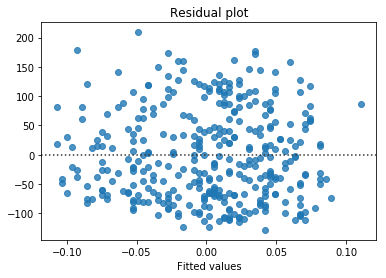

In [10]:
sns.residplot(x_train.age, y_train)
plt.xlabel("Fitted values")
plt.title('Residual plot')

We would want to check this for each of the features we found to have strong correlation with our target. We can see that the residuals for age vs diabetes does not show any patterns and thus would work well in a linear regression model. 

## Measuring Error
Now that we've checked the residuals for each of the relevant columns, we can evaluate the error in our linear model. 

There are three main errors (metrics) used to evaluate models, Mean absolute error, Mean Squared error and R2 score.

### Mean Absolute Error
Since we have our line of best fit, we can measure the distance between each point and the line to calculate the error (residuals). Because this measurement can be either positive or negative, we take the absolute value of each value so the effects of the signs don't cancel each other out, and sum the values, then take the average. 

#### Steps for calculating MSE
1. Measure error- for linear regression, this is the distance between each point and the line of best fit
2. Take the absolute value of the error at each data point
3. Calculate the mean

In [14]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, preds)

In [15]:
MAE

42.79389304196525

In [ ]:
The MAE represents the average error between our two values

In [ ]:
"Accuracy Score: {}".format(model.score(x_test, y_test))